<center><h1>Capstone Project Creation</h1></center>
<center><h3>IBM SkillsBuild Europe Delivery - Data Analytics</h3></center>


# Pre-requisite

* Understanding of Python, Power BI or Tableau
* Understanding of Data Cleaning 
* Understanding Data Visualization

### Data Analytics of Airbnb Data:

#### Objective:

In this exericise, you will be performing Data Analytics on an Open Dataset dataset coming from Airbnb. Some of the tasks include
- Data Cleaning.
- Data Transformation
- Data Visualization.

#### Overview of Airbnb Data:

People's main criteria when visiting new places are reasonable accommodation and food. Airbnb (Air-Bed-Breakfast) is an online marketplace created to meet this need of people by renting out their homes for a short term. They offer this facility at a relatively lower price than hotels. Further people worldwide prefer the homely and economical service offered by them. They offer services across various geographical locations

#### Dataset Source

YOu can get the dataset for this assessment using the following link: https://www.kaggle.com/datasets/arianazmoudeh/airbnbopendata

This dataset contains information such as the neighborhood offering these services, room type, price,avaliabilty, reviews, service fee, cancellation policy and rules to use the house. This analysis will help airbnb in improving its services.  

So all the best for your Data Analytics Journey on Airbnb data!!!

## Task 1: Data Loading (Python)

1. Read the csv file and load it into a pandas dataframe.
2. Display the first five rows of your dataframe.
3. Display the data types of the columns.

In [1]:
# import libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
import warnings
warnings.filterwarnings("ignore")



In [2]:
## Read the csv file
airData = pd.read_csv("Airbnb_Open_Data.csv")

In [3]:
## Display the first 5 rows
airData.head(5)

,id,NAME,host id,host_identity_verified,host name,neighbourhood group,neighbourhood,lat,long,country,...,service fee,minimum nights,number of reviews,last review,reviews per month,review rate number,calculated host listings count,availability 365,house_rules,license
0,1001254,Clean & quiet apt home by the park,80014485718,unconfirmed,Madaline,Brooklyn,Kensington,40.64749,-73.97237,United States,...,$193,10.0,9.0,10/19/2021,0.21,4.0,6.0,286.0,Clean up and treat the home the way you'd like...,NaN
1,1002102,Skylit Midtown Castle,52335172823,verified,Jenna,Manhattan,Midtown,40.75362,-73.98377,United States,...,$28,30.0,45.0,5/21/2022,0.38,4.0,2.0,228.0,Pet friendly but please confirm with me if the...,NaN
2,1002403,THE VILLAGE OF HARLEM....NEW YORK !,78829239556,NaN,Elise,Manhattan,Harlem,40.80902,-73.94190,United States,...,$124,3.0,0.0,NaN,NaN,5.0,1.0,352.0,"I encourage you to use my kitchen, cooking and...",NaN
3,1002755,NaN,85098326012,unconfirmed,Garry,Brooklyn,Clinton Hill,40.68514,-73.95976,United States,...,$74,30.0,270.0,7/5/2019,4.64,4.0,1.0,322.0,NaN,NaN
4,1003689,Entire Apt: Spacious Studio/Loft by central park,92037596077,verified,Lyndon,Manhattan,East Harlem,40.79851,-73.94399,United States,...,$41,10.0,9.0,11/19/2018,0.10,3.0,1.0,289.0,"Please no smoking in the house, porch or on th...",NaN


In [4]:
## Display the data types
airData.dtypes

id                                  int64
NAME                               object
host id                             int64
host_identity_verified             object
host name                          object
neighbourhood group                object
neighbourhood                      object
lat                               float64
long                              float64
country                            object
country code                       object
instant_bookable                   object
cancellation_policy                object
room type                          object
Construction year                 float64
price                              object
service fee                        object
minimum nights                    float64
number of reviews                 float64
last review                        object
reviews per month                 float64
review rate number                float64
calculated host listings count    float64
availability 365                  

## Task 2a: Data Cleaning (Any Tool)

1. Drop some of the unwanted columns. These include `host id`, `id`, `country` and `country code` from the dataset. 
2. State the reason for not including these columns for your Data Analytics.

If using Python for this exercise, please include the code in the cells below. If using any other tool, please include screenshoots before and after the elimination of the columns.

In [5]:
print("Number of Columns before dropping: ", airData.shape[1])

Number of Columns before dropping:  26


In [6]:
airData = airData.drop(["host id","id","country","country code","lat","long","NAME","license","house_rules","host name"], axis=1)

In [7]:
print("Number of Columns after dropping: ", airData.shape[1])

Number of Columns after dropping:  16


In [8]:
# The host id and the id and name of the user is not necessary for the analysis we want to do 
# it also helps improve anonymity if they are not available
# The country and country code is also not needed as all the data is US and we will be checking out new york only
# The lat and log is also not needed for the analysis
# The license most of the values are empty in the column check the little visualisation below

## Task 2b: Data Cleaning (Python)

- Check for missing values in the dataframe and display the count in ascending order. **If the values are missing, impute the values as per the datatype of the columns.**
- Check whether there are any duplicate values in the dataframe and, if present, remove them.
- Display the total number of records in the dataframe before and after removing the duplicates.

In [9]:
## Check for missing values in the dataframe and display the count in ascending order.
airData.isnull().sum().sort_values()

room type                             0
neighbourhood                        16
neighbourhood group                  29
cancellation_policy                  76
instant_bookable                    105
number of reviews                   183
Construction year                   214
price                               247
service fee                         273
host_identity_verified              289
calculated host listings count      319
review rate number                  326
minimum nights                      409
availability 365                    448
reviews per month                 15879
last review                       15893
dtype: int64

<Axes: >

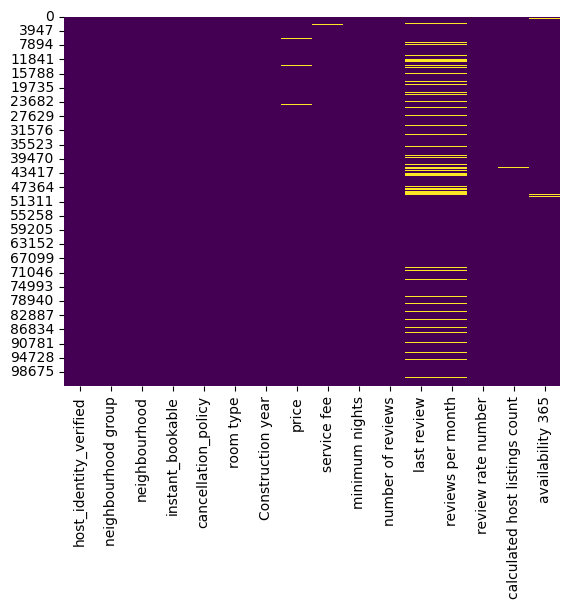

In [10]:
# we can use seaborn to visualise missing values
sns.heatmap(airData.isnull(),cbar=False,cmap="viridis")

In [11]:
categorical_null_values = airData.dtypes[airData.dtypes == "object"].index.tolist()
print("Categorical: ", categorical_null_values)

numerical_null_values = [col for col in airData.columns if col not in categorical_null_values]
print("Numerical: ", numerical_null_values)




Categorical:  ['host_identity_verified', 'neighbourhood group', 'neighbourhood', 'instant_bookable', 'cancellation_policy', 'room type', 'price', 'service fee', 'last review']
Numerical:  ['Construction year', 'minimum nights', 'number of reviews', 'reviews per month', 'review rate number', 'calculated host listings count', 'availability 365']


In [12]:
# Impute the values
# we put 0 for numerical data and unknown for categorical data
for col in numerical_null_values:
    airData[col] = airData[col].fillna(0)
    
for col in categorical_null_values:
    airData[col] = airData[col].fillna("unknown")

<Axes: >

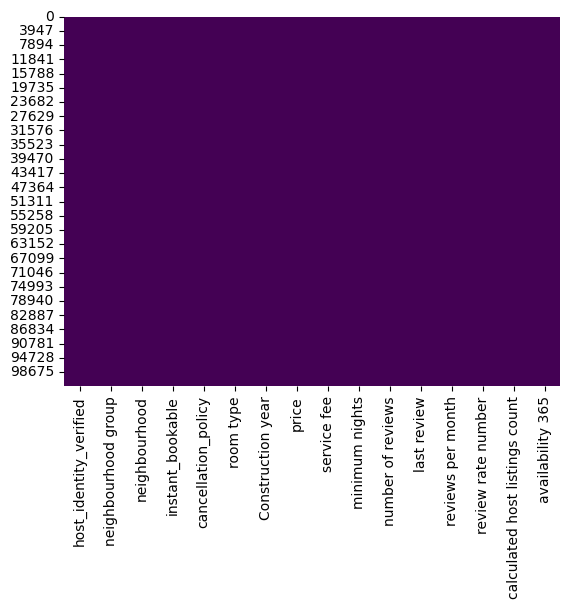

In [13]:
# we can then use seaborn again to check for missing values
sns.heatmap(airData.isnull(),cbar=False,cmap="viridis")

In [14]:
## Check whether there are any duplicate values in the dataframe and if present remove them.
print("Number of duplicates: ", airData.duplicated().sum())
airData.drop_duplicates(inplace=True)
print("Number of duplicates: ", airData.duplicated().sum())

Number of duplicates:  3636
Number of duplicates:  0


In [15]:
## Display the total number of records in the dataframe after removing the duplicates.
airData.info()

<class 'pandas.core.frame.DataFrame'>
Index: 98963 entries, 0 to 102057
Data columns (total 16 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   host_identity_verified          98963 non-null  object 
 1   neighbourhood group             98963 non-null  object 
 2   neighbourhood                   98963 non-null  object 
 3   instant_bookable                98963 non-null  object 
 4   cancellation_policy             98963 non-null  object 
 5   room type                       98963 non-null  object 
 6   Construction year               98963 non-null  float64
 7   price                           98963 non-null  object 
 8   service fee                     98963 non-null  object 
 9   minimum nights                  98963 non-null  float64
 10  number of reviews               98963 non-null  float64
 11  last review                     98963 non-null  object 
 12  reviews per month               9896

## Task 3: Data Transformation (Any Tool)


- Rename the column `availability 365` to `days_booked`
- Convert all column names to lowercase and replace the spaces in the column names with an underscore "_".
- Remove the dollar sign and comma from the columns `price` and `service_fee`. If necessary, convert these two columns to the appropriate data type.

If using Python for this exercise, please include the code in the cells below. If using any other tool, please include screenshoots of your work.

In [16]:
## Rename the column.
airData.rename(columns = {"availability 365":"days_booked"}, inplace = True)

In [17]:
## Convert all column names to lowercase and replace the spaces with an underscore "_"
airData.rename(columns=lambda x: x.lower().replace(' ', '_'), inplace=True)

In [18]:
## Remove the dollar sign and comma from the columns. If necessary, convert these two columns to the appropriate data type.
# and as i replace the data type to float i need to fill the value with 0
airData['price'] = airData['price'].str.replace('$', '', regex=False).str.replace(',', '').str.replace('unknown', '0').astype(float)

airData['service_fee'] =airData['service_fee'].str.replace('$', '', regex=False).str.replace(',', '').str.replace('unknown', '0').astype(float)

### Task 4: Exploratory Data Analysis (Any Tool)

- List the count of various room types avaliable in the dataset.
- Which room type has the most strict cancellation policy?
- List the average price per neighborhood group, and highlight the most expensive neighborhood to rent from.

If using Python for this exercise, please include the code in the cells below. If using any other tool, please include screenshoots of your work.

In [19]:
airData.head(2)

,host_identity_verified,neighbourhood_group,neighbourhood,instant_bookable,cancellation_policy,room_type,construction_year,price,service_fee,minimum_nights,number_of_reviews,last_review,reviews_per_month,review_rate_number,calculated_host_listings_count,days_booked
0,unconfirmed,Brooklyn,Kensington,False,strict,Private room,2020.0,966.0,193.0,10.0,9.0,10/19/2021,0.21,4.0,6.0,286.0
1,verified,Manhattan,Midtown,False,moderate,Entire home/apt,2007.0,142.0,28.0,30.0,45.0,5/21/2022,0.38,4.0,2.0,228.0


In [20]:
## List the count of various room types avaliable with Airbnb
print("Room Type: ", airData["room_type"].value_counts())

Room Type:  room_type
Entire home/apt    51908
Private room       44796
Shared room         2144
Hotel room           115
Name: count, dtype: int64


In [24]:
## Which room type adheres to more strict cancellation policy
df = airData[["cancellation_policy", "room_type"]]

df.groupby("room_type").value_counts(normalize=True)*100



room_type        cancellation_policy
Entire home/apt  flexible               33.403329
                 moderate               33.351314
                 strict                 33.149033
                 unknown                 0.096324
Hotel room       flexible               38.260870
                 moderate               32.173913
                 strict                 29.565217
Private room     moderate               33.643629
                 strict                 33.264131
                 flexible               33.040897
                 unknown                 0.051344
Shared room      strict                 33.442164
                 moderate               33.255597
                 flexible               33.162313
                 unknown                 0.139925
Name: proportion, dtype: float64

In [ ]:
# The shared room has the most strict cancellation policy

In [34]:
## List the prices by neighborhood group and also mention which is the most expensive neighborhood group for rentals
print(airData["neighbourhood_group"].value_counts().index.to_list())

airData['neighbourhood_group'] = airData['neighbourhood_group'].replace('manhatan', 'Manhattan')
airData['neighbourhood_group'] = airData['neighbourhood_group'].replace('brookln', 'Brooklyn')

print(airData.groupby("neighbourhood_group")["price"].median().sort_values(ascending=False))

['Manhattan', 'Brooklyn', 'Queens', 'Bronx', 'Staten Island', 'unknown']
neighbourhood_group
unknown          651.0
Bronx            630.0
Staten Island    629.0
Brooklyn         625.0
Queens           625.0
Manhattan        620.0
Name: price, dtype: float64


## Task 5a: Data Visualization (Any Tool)

- Create a horizontal bar chart to display the top 10 most expensive neighborhoods in the dataset.
    - Create another chart with the 10 cheapest neighborhoods in the dataset.
- Create a box and whisker chart that showcases the price distribution of all listings split by room type.

If using Python for this exercise, please include the code in the cells below. If using any other tool, please include screenshoots of your work.

            neighbourhood   price
0                New Dorp  1044.0
1  Chelsea, Staten Island  1042.0
2                 Woodrow  1025.0
3          Fort Wadsworth  1024.0
4           Jamaica Hills   971.0
5           Midland Beach   957.0
6               Riverdale   937.0
7         East Morrisania   920.0
8                Huguenot   917.0
9             Shore Acres   896.0


Text(0, 0.5, 'Neighborhood')

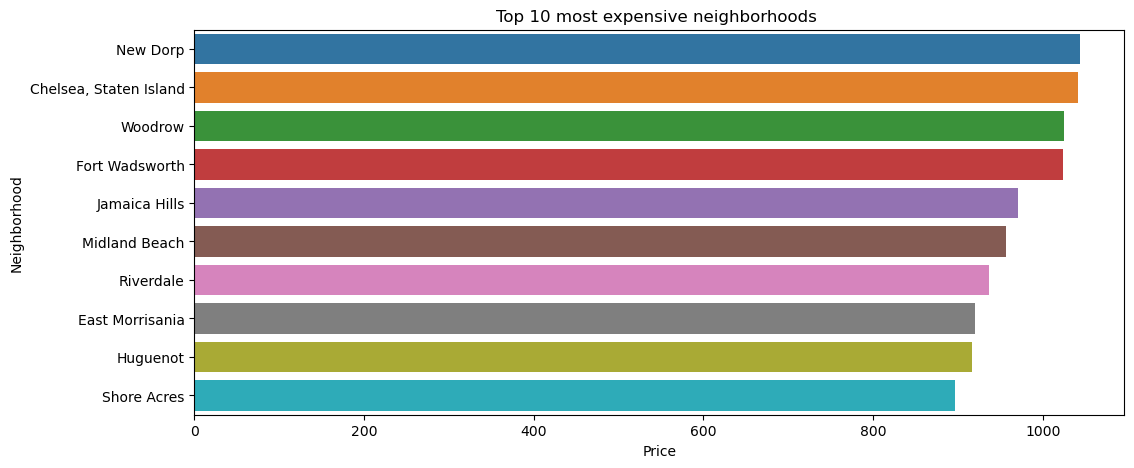

In [49]:
top_10_exp = airData.groupby("neighbourhood")["price"].median().nlargest(10).reset_index()
print(top_10_exp)

plt.figure(figsize = (12,5))
sns.barplot(top_10_exp,y="neighbourhood",x="price")
plt.title("Top 10 most expensive neighborhoods ")
plt.xlabel("Price")
plt.ylabel("Neighborhood")

                neighbourhood  price
0  Bay Terrace, Staten Island   59.0
1             Lighthouse Hill  127.0
2                Richmondtown  212.0
3              Spuyten Duyvil  215.0
4                Breezy Point  232.0
5                  Co-op City  278.0
6                Emerson Hill  317.0
7              New Dorp Beach  323.0
8                   Rossville  327.5
9           Castleton Corners  335.0


Text(0, 0.5, 'Neighborhood')

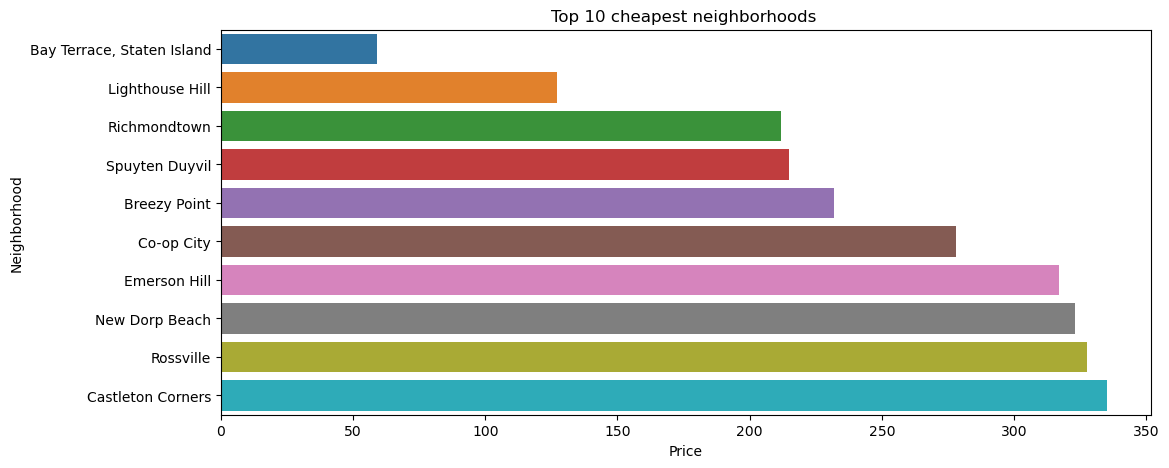

In [52]:
top_10_cheap = airData.groupby("neighbourhood")["price"].median().nsmallest(10).reset_index()
print(top_10_cheap)

plt.figure(figsize = (12,5))
sns.barplot(top_10_cheap,y="neighbourhood",x="price")
plt.title("Top 10 cheapest neighborhoods ")
plt.xlabel("Price")
plt.ylabel("Neighborhood")

Text(0.5, 0, 'Room Type')

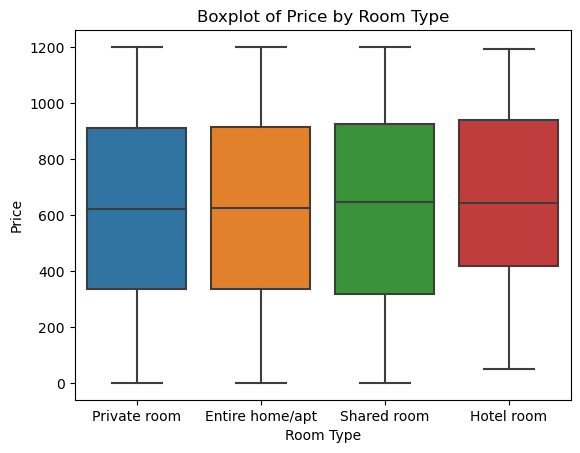

In [57]:
sns.boxplot(data=airData, y="price", x="room_type")
plt.title("Boxplot of Price by Room Type")
plt.ylabel("Price")
plt.xlabel("Room Type")

## Task 5b: Data Visualization (Any Tool)

- Create a scatter plot to illustrate the relationshi between the cleaning fee and the room price and write down the kind of correlation, if any, that you see.
- Create a line chart to showcase the total amount of listings available per year.

If using Python for this exercise, please include the code in the cells below. If using any other tool, please include screenshoots of your work.

In [60]:
airData.head(1)

,host_identity_verified,neighbourhood_group,neighbourhood,instant_bookable,cancellation_policy,room_type,construction_year,price,service_fee,minimum_nights,number_of_reviews,last_review,reviews_per_month,review_rate_number,calculated_host_listings_count,days_booked
0,unconfirmed,Brooklyn,Kensington,False,strict,Private room,2020.0,966.0,193.0,10.0,9.0,10/19/2021,0.21,4.0,6.0,286.0


Text(0.5, 1.0, 'Scatter Plot illustrating rel btw Cleaning fee & Price')

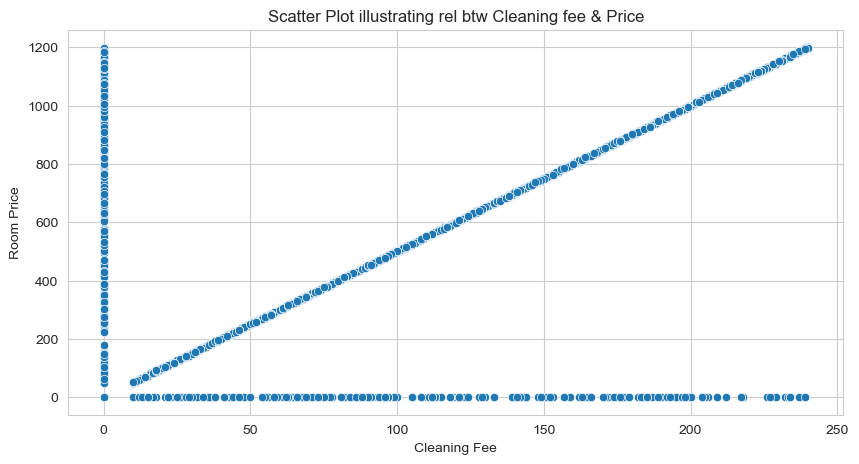

In [66]:
sns.set_style("whitegrid")
plt.figure(figsize=(10,5))
sns.scatterplot(data=airData,x="service_fee", y="price")
plt.xlabel("Cleaning Fee")
plt.ylabel("Room Price")
plt.title("Scatter Plot illustrating rel btw Cleaning fee & Price")


In [ ]:
# The plot looks quite confusing because of the imputed values

In [67]:
airData.head(1)

,host_identity_verified,neighbourhood_group,neighbourhood,instant_bookable,cancellation_policy,room_type,construction_year,price,service_fee,minimum_nights,number_of_reviews,last_review,reviews_per_month,review_rate_number,calculated_host_listings_count,days_booked
0,unconfirmed,Brooklyn,Kensington,False,strict,Private room,2020.0,966.0,193.0,10.0,9.0,10/19/2021,0.21,4.0,6.0,286.0


Text(0.5, 1.0, 'Lineplot showing total amount of listings available per year')

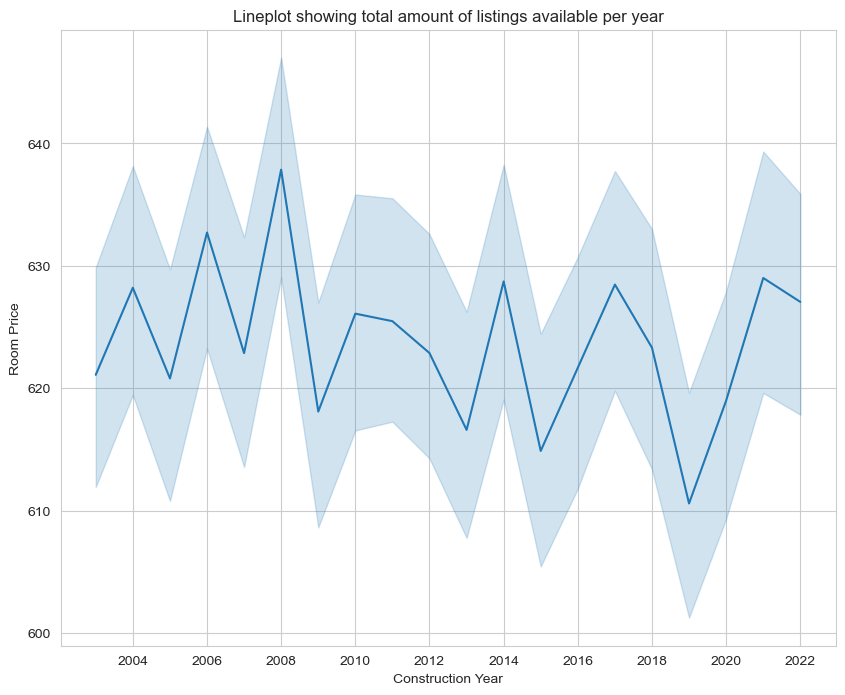

In [80]:
# a line chart to showcase the total amount of listings available per year.
# remove imputed year values
air_year = airData.drop(airData[airData["construction_year"] == 0].index)
air_year["construction_year"] = pd.to_datetime(air_year["construction_year"], format='ISO8601')

plt.figure(figsize=(10,8))
sns.lineplot(x="construction_year",y="price", data=air_year)
plt.xlabel("Construction Year")
plt.ylabel("Room Price")
plt.title("Lineplot showing total amount of listings available per year")

## Task 5c: Data Visualization (Any Tool)

- Create a data visualization of your choosing using one of the review columns in isolation or in combination with another column.

If using Python for this exercise, please include the code in the cells below. If using any other tool, please include screenshoots of your work.

In [81]:
airData.head(1)

,host_identity_verified,neighbourhood_group,neighbourhood,instant_bookable,cancellation_policy,room_type,construction_year,price,service_fee,minimum_nights,number_of_reviews,last_review,reviews_per_month,review_rate_number,calculated_host_listings_count,days_booked
0,unconfirmed,Brooklyn,Kensington,False,strict,Private room,2020.0,966.0,193.0,10.0,9.0,10/19/2021,0.21,4.0,6.0,286.0


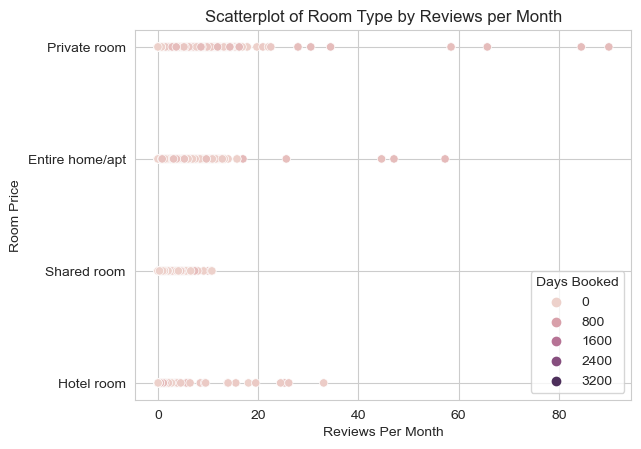

In [94]:
sns.scatterplot(y="room_type", x="reviews_per_month",data=airData,hue="days_booked")
plt.xlabel("Reviews Per Month")
plt.ylabel("Room Price")
plt.title("Scatterplot of Room Type by Reviews per Month")
plt.legend(title="Days Booked")